# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Defining agent object

In [2]:
class Agent (object):
    def __init__(self, unique_id, i_wealth, N, debt):
        self.id = unique_id
        self.wealth = i_wealth
        self.N = N
        self.other_agents = self.OtherAgents()
        self.debt = debt
        
    def OtherAgents (self):
        lst = []
        for i in range(self.N):
            if self.id != i:
                lst.append(i)
        return lst
    
    def GiveMoney(self):
        # Select agent to give money
        agent2give = np.random.choice(self.other_agents)
        if self.wealth == 0 and self.debt == 'no':
            amount = 0
        else:
            amount = 1
            self.wealth = self.wealth - amount
        return agent2give, amount
    
    def Receive (self):
        self.wealth = self.wealth + 1
        

# 1st Simulation - No debt allowed

In [41]:
# Creating agents

# Defining parameters
N = 10
wealth = 1
agents = []
debt = 'no' # valid choices: 'yes', 'no'

for i in range(N):
    unique_id = i
    agents.append(Agent(unique_id, wealth, N, debt))

# Starting game
run_data = np.arange(N)
runs = 500
steps = 100
for k in range(runs):
    for i in range(steps):
        # Initialize agents Rrandomly
        np.random.shuffle(agents)

        # Tick
        for agent in agents:
            receiver, amount = agent.GiveMoney()
            if amount !=0:
                agents[receiver].Receive()

    # Data collection
    data = np.zeros((N,2))
    for i in range(len(agents)):
        data[i,0] = agents[i].id
        data[i,1] = agents[i].wealth

    # Sort array
    d = data[data[:,0].argsort()][:,1]
    noDebtRun_data = np.vstack((run_data, d))

In [42]:
# x = range(N)
# plt.bar(data[:,0], data[:,1])
# plt.xlabel('Agents id')
# plt.ylabel('Whealth')
# plt.title('Random Wealth Game')
# plt.grid(True)
# plt.show()

In [43]:
NoDebt_df = pd.DataFrame(data=noDebtRun_data[1:,:])
# df.head()

In [44]:
# df.describe()

In [45]:
noDebtMean_data = np.zeros((N,2))
for j in range(N):
    noDebtMean_data[j,0] = j
    noDebtMean_data[j,1] = NoDebt_df.mean(0)[j]
# mean_data

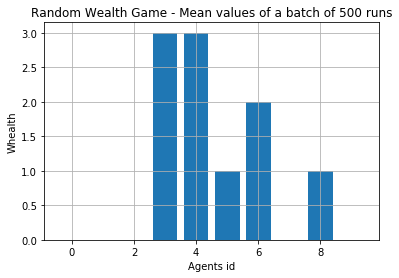

In [46]:
x = range(N)
plt.bar(noDebtMean_data[:,0], noDebtMean_data[:,1])
plt.xlabel('Agents id')
plt.ylabel('Whealth')
plt.title('Random Wealth Game - Mean values of a batch of ' + str(runs) + ' runs')
plt.grid(True)
plt.show()

# 2nd Simulation - Debt allowed

In [9]:
# Creating agents

# Defining parameters
N = 10
wealth = 1
agents = []
debt = 'yes' # valid choices: 'yes', 'no'

for i in range(N):
    unique_id = i
    agents.append(Agent(unique_id, wealth, N, debt))

# Starting game
run_data = np.arange(N)
runs = 500
steps = 100
for k in range(runs):
    for i in range(steps):
        # Initialize agents Rrandomly
        np.random.shuffle(agents)

        # Tick
        for agent in agents:
            receiver, amount = agent.GiveMoney()
            if amount !=0:
                agents[receiver].Receive()

    # Data collection
    data = np.zeros((N,2))
    for i in range(len(agents)):
        data[i,0] = agents[i].id
        data[i,1] = agents[i].wealth

    # Sort array
    d = data[data[:,0].argsort()][:,1]
    debtRun_data = np.vstack((run_data, d))

In [10]:
debt_df = pd.DataFrame(data=debtRun_data[1:,:])

In [11]:
debtMean_data = np.zeros((N,2))
for j in range(N):
    debtMean_data[j,0] = j
    debtMean_data[j,1] = debt_df.mean(0)[j]

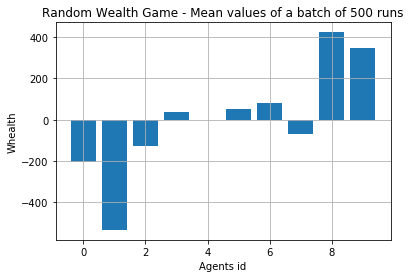

In [12]:
x = range(N)
plt.bar(debtMean_data[:,0], debtMean_data[:,1])
plt.xlabel('Agents id')
plt.ylabel('Whealth')
plt.title('Random Wealth Game - Mean values of a batch of ' + str(runs) + ' runs')
plt.grid(True)
plt.show()

# 3rd Simulation - Debt allowed, different initial wealth

In [13]:
# Creating agents

# Defining parameters
N = 10
agents = []
debt = 'yes' # valid choices: 'yes', 'no'

for i in range(N):
    wealth = np.random.randint(10)
    unique_id = i
    agents.append(Agent(unique_id, wealth, N, debt))

# Starting game
run_data = np.arange(N)
runs = 500
steps = 100
for k in range(runs):
    for i in range(steps):
        # Initialize agents Rrandomly
        np.random.shuffle(agents)

        # Tick
        for agent in agents:
            receiver, amount = agent.GiveMoney()
            if amount !=0:
                agents[receiver].Receive()

    # Data collection
    data = np.zeros((N,2))
    for i in range(len(agents)):
        data[i,0] = agents[i].id
        data[i,1] = agents[i].wealth

    # Sort array
    d = data[data[:,0].argsort()][:,1]
    debtDiffWealthRun_data = np.vstack((run_data, d))

In [14]:
debtDiffWealth_df = pd.DataFrame(data=debtDiffWealthRun_data[1:,:])

In [15]:
debtDiffWealthMean_data = np.zeros((N,2))
for j in range(N):
    debtDiffWealthMean_data[j,0] = j
    debtDiffWealthMean_data[j,1] = debtDiffWealth_df.mean(0)[j]

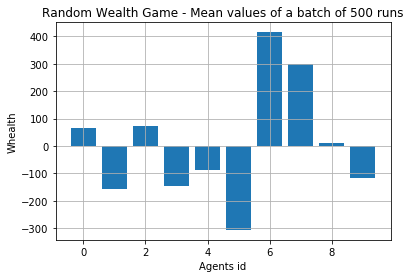

In [16]:
x = range(N)
plt.bar(debtDiffWealthMean_data[:,0], debtDiffWealthMean_data[:,1])
plt.xlabel('Agents id')
plt.ylabel('Whealth')
plt.title('Random Wealth Game - Mean values of a batch of ' + str(runs) + ' runs')
plt.grid(True)
plt.show()